In [1]:
import matplotlib.pyplot as plt
import matplotlib
import copy
import numpy as np
import xarray as xr
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [2]:
Snap   = xr.open_dataset('Snapshot.nc')

/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increas

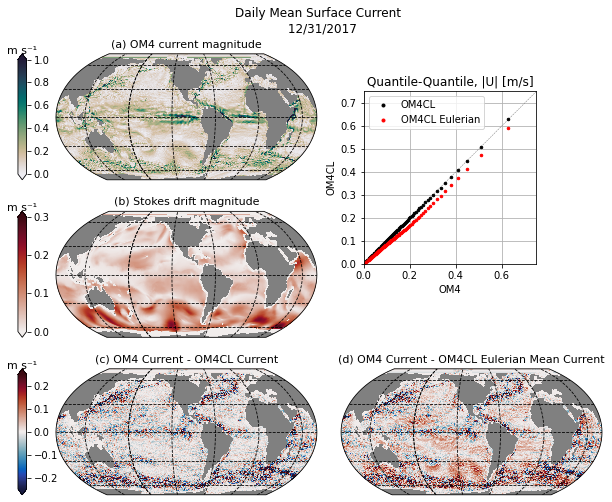

In [3]:
D1=0.55; D2=0.25;

fig=plt.figure(figsize=(12, 7))

projection = ccrs.EqualEarth(central_longitude=-100.0)

ax1 = fig.add_axes([0.07, 0.5+3*0.25/4-0.05, D1, D2], projection=projection)
ax2 = fig.add_axes([0.07, 0.25+0.25/2-0.05, D1, D2], projection=projection)
ax3 = fig.add_axes([0.07, 0.25/4-0.05, D1, D2], projection=projection)

ax4 = fig.add_axes([0.4, 0.25/4-0.05, D1, D2], projection=projection)
ax5 = fig.add_axes([0.55, 0.52-0.05, 0.2, 0.2*12/7])

axcb1 = fig.add_axes([0.15, 0.5+3*0.25/4-0.05, 0.01, D2])
axcb2 = fig.add_axes([0.15, 0.25+0.25/2-0.05, 0.01, D2])
axcb3 = fig.add_axes([0.15, 0.25/4-0.05, 0.01, D2])

cmap = cmocean.cm.rain
cmap.set_bad(alpha=0)

ax=ax1
p=Snap.OM4_Umag.plot(x='geolon', y='geolat',
                       vmin=0., vmax=1, cmap=cmap,
                       transform=ccrs.PlateCarree(),
                       add_labels=False,
                       add_colorbar=False,
                       ax=ax,
                       shading="auto",
                       rasterized=True,
                       zorder=-20
             )
ax.set_title('(a) OM4 current magnitude', fontsize=11)

cb = plt.colorbar(p, cax=axcb1, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)

cmap2 = cmocean.cm.amp
cmap2.set_bad(alpha=0)

ax=ax2
p2=Snap.OM4CL_Umag_Stk.plot(x='geolon', y='geolat',
                       vmin=0., vmax=0.3, cmap=cmap2,
                       transform=ccrs.PlateCarree(),
                       add_labels=False,
                       add_colorbar=False,
                       ax=ax,
                       shading="auto",
                       rasterized=True,
                       zorder=-20
             )
ax.set_title('(b) Stokes drift magnitude', fontsize=11)

cb = plt.colorbar(p2, cax=axcb2, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)


cmap3 = cmocean.cm.balance
cmap3.set_bad(alpha=0)

ax=ax3
(Snap.OM4_Umag-Snap.OM4CL_Umag).plot(x='geolon', y='geolat',
                       vmin=-0.25, vmax=0.25, cmap=cmap3,
                       transform=ccrs.PlateCarree(),
                       add_labels=False,
                       add_colorbar=False,
                       ax=ax,
                       shading="auto",
                       rasterized=True,
                       zorder=-20
             )
ax.set_title('(c) OM4 Current - OM4CL Current', fontsize=11)

ax=ax4
p3=(Snap.OM4_Umag-Snap.OM4CL_Umag_Eul).plot(x='geolon', y='geolat',
                       vmin=-0.25, vmax=0.25, cmap=cmap3,
                       transform=ccrs.PlateCarree(),
                       add_labels=False,
                       add_colorbar=False,
                       ax=ax,
                       shading="auto",
                       rasterized=True,
                       zorder=-20
             )
ax.set_title('(d) OM4 Current - OM4CL Eulerian Mean Current', fontsize=11)

cb = plt.colorbar(p3, cax=axcb3, orientation='vertical', extend='both')
cb.ax.set_title(r'm s⁻¹', fontsize=11)


ax5.plot([-10,10],[-10,10],'--',color='gray',linewidth=0.5)
FM1 = 'k.'
FM2 = 'r.'
ax5.plot(0,1e1,FM1,label='OM4CL')
ax5.plot(0,1e1,FM2,label='OM4CL Eulerian')

for q in range(100):
    
    ax5.plot(np.nanpercentile(Snap.OM4_Umag,q),
             np.nanpercentile(Snap.OM4CL_Umag,q),
             FM1,markersize=5)
    ax5.plot(np.nanpercentile(Snap.OM4_Umag,q),
             np.nanpercentile(Snap.OM4CL_Umag_Eul,q),
             FM2,markersize=5)
    
LM = [0,0.75]
ax5.set(xlim=LM,ylim=LM,title='Quantile-Quantile, |U| [m/s]',xlabel='OM4',ylabel='OM4CL')
ax5.legend()
ax5.grid(True)

for ax in [ax1, ax2, ax3, ax4 ]:
    ax.set_facecolor('grey')
    ax.gridlines(color='black', linestyle='--')

fig.suptitle('Daily Mean Surface Current \n 12/31/2017')
fig.savefig('./figure_3.pdf', dpi=320,
            bbox_inches='tight', 
            pad_inches=0.02)